# **Libraries**
***

Import needed common libraries

In [6]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 


# **Data Understanding**
***

## **Data Information:**
I have downloaded a fuel consumption dataset from Canada Open Data repository, [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

Its contains vehicle's fuel consumption ratings and carbon dioxide (CO2) emissions for retail sale in Canada. 

## **Understanding the table**	
01. **Year:** Vehicle's model year (2021)
02. **Make:** Vehicle's makes (i.e. brands)
03. **Model:** 4WD/4X4 = *Four-wheel drive*, AWD = *All-wheel drive*, FFV = *Flexible-fuel vehicle*, SWB = *Short wheelbase*, LWB = *Long wheelbase*, EWB = *Extended wheelbase*
04. **Class:** Vehicle's classes (i.e. SUV, Van, Pickup, Compact, etc)
05. **Transmission:** A = *automatic*, AM = *automated manual*, AS = *automatic with select shift*, AV = *continuously variable*, M = *manual*, 3 – 10 = *Number of gears*

06. **Fuel type:** X = *regular gasoline*, Z = *premium gasoline*, D = *diesel*, E = *ethanol (E85)*, N = *natural gas*

07. **Fuel consumption:** *City* and *highway* fuel consumption ratings are shown in litres per 100 kilometres (L/100 km), The combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

08. **CO2 emissions:** The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

09. **CO2 rating:** The tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

10. **Smog rating:** The tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

## **Load dataset:** 
### `MY2021 Fuel Consumption Ratings.csv`
######################################################################################################################

In [7]:
df = pd.read_csv("../BD00-Datasets/csv-datasets/MY2021-FuelConsumptionRatings.csv")
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           917 non-null    int64  
 1   Make           917 non-null    object 
 2   Model          917 non-null    object 
 3   Class          917 non-null    object 
 4   Engine         917 non-null    float64
 5   Cylinders      917 non-null    int64  
 6   Transmission   917 non-null    object 
 7   Fuel           917 non-null    object 
 8   FC_City        917 non-null    float64
 9   FC_Highway     917 non-null    float64
 10  FC_Comb        917 non-null    float64
 11  FC_MPG         917 non-null    int64  
 12  CO2_Emissions  917 non-null    int64  
 13  CO2_Ratings    917 non-null    int64  
 14  Smog_Rating    917 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 107.6+ KB


# **Exploratory Data Analysys (EDA)**
***
## **Data Exploration**
######################################################################################################################

In [8]:
df.head()

,Year,Make,Model,Class,Engine,Cylinders,Transmission,Fuel,FC_City,FC_Highway,FC_Comb,FC_MPG,CO2_Emissions,CO2_Ratings,Smog_Rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [9]:
df.nunique()

Year               1
Make              38
Model            690
Class             15
Engine            37
Cylinders          8
Transmission      23
Fuel               4
FC_City          145
FC_Highway       108
FC_Comb          129
FC_MPG            49
CO2_Emissions    235
CO2_Ratings       10
Smog_Rating        5
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,917.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.0,2021.0
Engine,917.0,3.199891,1.393470,1.0,2.0,3.0,4.0,8.0
Cylinders,917.0,5.693566,1.984903,3.0,4.0,6.0,8.0,16.0
FC_City,917.0,12.440785,3.480676,4.0,10.1,12.0,14.7,30.3
FC_Highway,917.0,9.258670,2.195719,3.9,7.7,9.0,10.7,20.9
FC_Comb,917.0,11.006652,2.856344,4.0,9.1,10.6,12.9,26.1
FC_MPG,917.0,27.471101,7.741913,11.0,22.0,27.0,31.0,71.0
CO2_Emissions,917.0,257.516903,64.491587,94.0,212.0,253.0,301.0,608.0
CO2_Ratings,917.0,4.383860,1.643726,1.0,3.0,4.0,5.0,10.0
Smog_Rating,917.0,4.709924,1.720300,1.0,3.0,5.0,6.0,7.0


In [11]:
df.isnull().sum()

Year             0
Make             0
Model            0
Class            0
Engine           0
Cylinders        0
Transmission     0
Fuel             0
FC_City          0
FC_Highway       0
FC_Comb          0
FC_MPG           0
CO2_Emissions    0
CO2_Ratings      0
Smog_Rating      0
dtype: int64

# **Data Preparation**
***
## **Outliers Analysis:** Continuous features check
######################################################################################################################


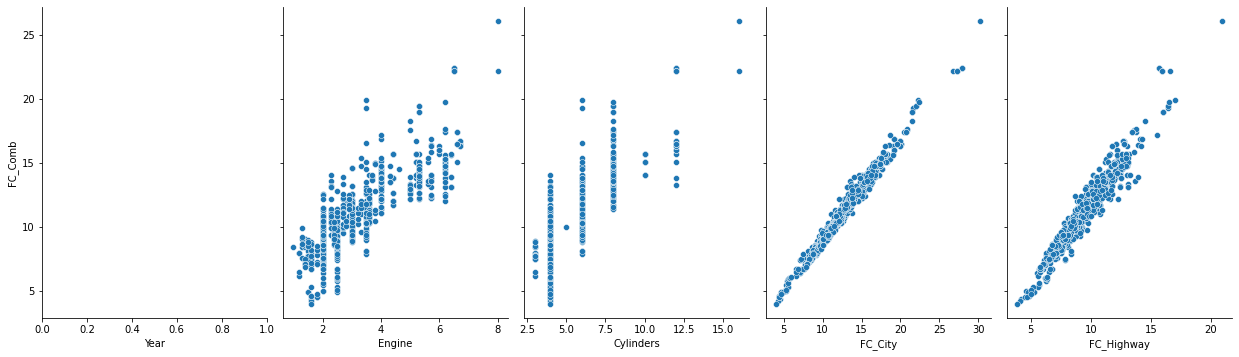

In [12]:
import seaborn as sns

#sns.pairplot(df, x_vars= ['Make', 'Model', 'Class', 'Engine', 'Cylinders', 'Transmission', 'Fuel', 'FC_City', 'FC_Highway', 'CO2_Emissions'], 
sns.pairplot(df, x_vars= ['Year', 'Engine', 'Cylinders', 'FC_City', 'FC_Highway'], 
                 y_vars='FC_Comb', height=5, aspect=0.7, kind='scatter');

0.9016775399289725


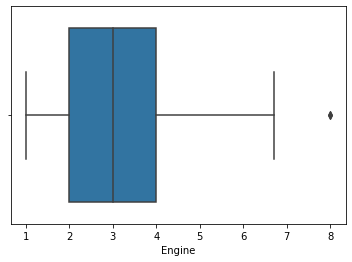

In [13]:
print(df['Engine'].skew())
sns.boxplot(x="Engine", data=df);

1.1596844006115434


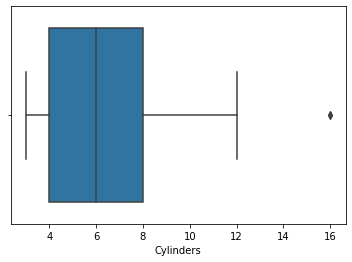

In [14]:
print(df['Cylinders'].skew())
sns.boxplot(x="Cylinders", data=df);

0.7843363143675736


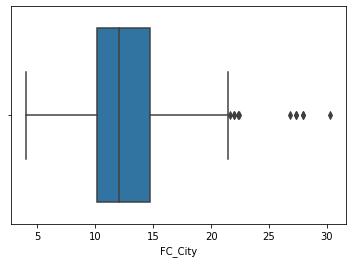

In [15]:
print(df['FC_City'].skew())
sns.boxplot(x="FC_City", data=df);

0.6880410919709732


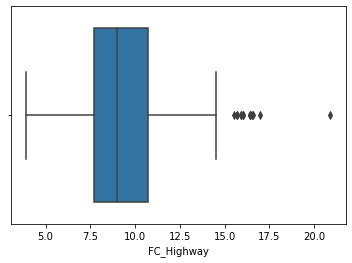

In [16]:
print(df['FC_Highway'].skew())
sns.boxplot(x="FC_Highway", data=df);

0.582423719012515


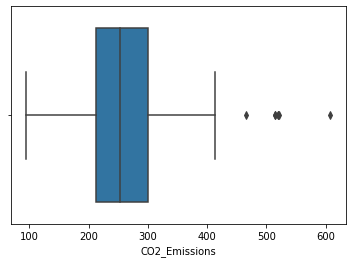

In [17]:
print(df['CO2_Emissions'].skew())
sns.boxplot(x="CO2_Emissions", data=df);

### **Removing outliers**
######################################################################################################################

In [18]:
#cdf = ['Engine','Cylinders','FC_City','FC_Highway','FC_Comb','FC_MPG']
cdf = ['Engine','Cylinders','FC_City','FC_Highway']
for i in cdf:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(F"Min: {min}")
    print(f"Max: {max}\n")
    
    df = df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)

Engine
Min: -1.0
Max: 7.0

Cylinders
Min: -2.0
Max: 14.0

FC_City
Min: 3.2
Max: 21.599999999999998

FC_Highway
Min: 3.3500000000000005
Max: 14.95



In [19]:
df.head()

,Year,Make,Model,Class,Engine,Cylinders,Transmission,Fuel,FC_City,FC_Highway,FC_Comb,FC_MPG,CO2_Emissions,CO2_Ratings,Smog_Rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


### **Correlation analysis**
######################################################################################################################

              Engine  Cylinders   FC_City  FC_Highway
Engine      1.000000   0.917130  0.837016    0.749184
Cylinders   0.917130   1.000000  0.838298    0.738917
FC_City     0.837016   0.838298  1.000000    0.919517
FC_Highway  0.749184   0.738917  0.919517    1.000000


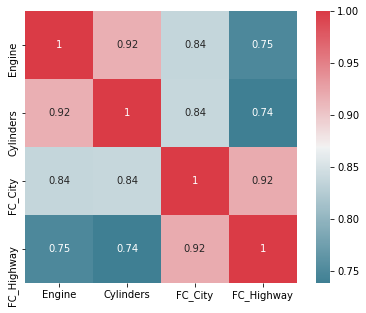

In [20]:
df_corr = df.loc[:,cdf]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
print(corr)

### **Dropping unneeded columns**
######################################################################################################################

In [21]:
#df = df.drop(['Year','Make','Model','FC_MPG'], axis=1)
df = df.drop(['Year', 'Model', 'FC_MPG', 'CO2_Emissions', 'CO2_Ratings', 'Smog_Rating'], axis=1)
df.head()

,Make,Class,Engine,Cylinders,Transmission,Fuel,FC_City,FC_Highway,FC_Comb
0,Acura,Compact,2.4,4,AM8,Z,9.9,7.0,8.6
1,Acura,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0
2,Acura,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9
3,Acura,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3
4,Acura,Compact,2.0,4,AS10,Z,11.2,8.0,9.8


## **Categorical features check**
######################################################################################################################

In [22]:
# Helper procedure for displaying bar plot
def b_plot(data=None, col=None):
    df_count = data[col].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(x=df_count.index, y=df_count.values, alpha=.9)
    if (col=='Class' or col=='Make'):
        label = f"Vehicle {col}"
    elif (col=='Fuel' or col=='Model'):
        label = f"{col} Type"
    else: label = col
    
    plt.title(f"Frequency Distribution of {label}")
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(label, fontsize=12)
    plt.show()

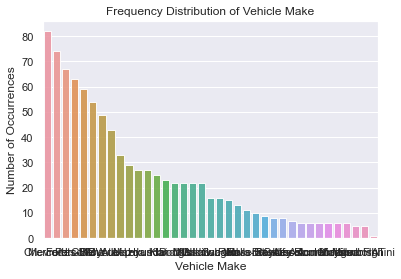

In [23]:
b_plot(df, 'Make')

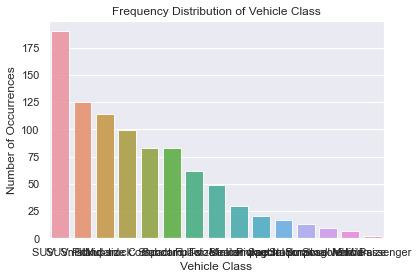

In [24]:
b_plot(df, 'Class')

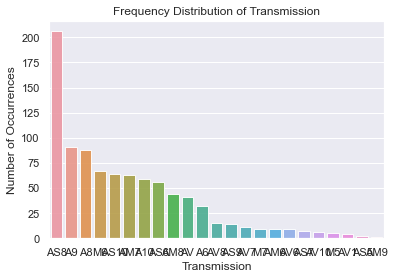

In [25]:
b_plot(df, 'Transmission')

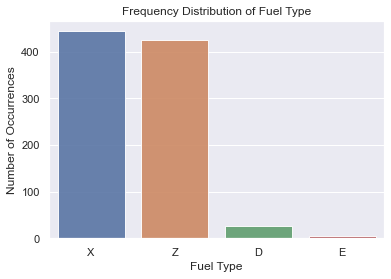

In [26]:
b_plot(df, 'Fuel')

### **Analysis of Variance (ANOVA)** of categorical features with linearOLS model
######################################################################################################################

In [77]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Anova
lm_fit = ols('FC_Comb ~ C(Make) + C(Class) + C(Transmission) + C(Fuel)', data = df).fit()

#print(f"{sm.stats.anova_lm(lm_fit, typ=2)}\n\n{lm_fit.summary()}")
print(f"ANOVA result of model\'s total variation, degree of freedom,\nand F-Stats & P-value significance:\n\n{sm.stats.anova_lm(lm_fit, typ=2)}")


### **Encoding categorical features**
######################################################################################################################

In [40]:
from sklearn.preprocessing import LabelBinarizer

# Helper function for encoding categorical variabels
def lb_results(data=None):
    lb = LabelBinarizer()
    lb_fit = lb.fit_transform(data)
    lb_result = pd.DataFrame(lb_fit, columns=lb.classes_)
    return lb_result

In [39]:
cat_df= df.select_dtypes(include=['object']).copy()
cat_df.shape

(903, 4)

In [41]:
lb_make = lb_results(cat_df['Make'])

print(lb_make.shape)
lb_make.head()

(903, 37)


,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,...,Mercedes-Benz,Mitsubishi,Nissan,Porsche,Ram,Rolls-Royce,Subaru,Toyota,Volkswagen,Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
lb_class = lb_results(cat_df['Class'])

print(lb_class.shape)
lb_class.head()

(903, 15)


,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater,Van: Passenger
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
lb_trans = lb_results(cat_df['Transmission'])

print(lb_trans.shape)
lb_trans.head()

(903, 23)


,A10,A6,A8,A9,AM6,AM7,AM8,AM9,AS10,AS5,...,AS9,AV,AV1,AV10,AV6,AV7,AV8,M5,M6,M7
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
lb_fuel = lb_results(cat_df['Fuel'])

print(lb_fuel.shape)
lb_fuel.head()

(903, 4)


,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


### **Rebuilt final dataframe**
######################################################################################################################

In [71]:
# Combining encoded categorical variabels dataframe
encoded_df = pd.concat([lb_make, lb_class, lb_trans, lb_fuel], axis=1)

print(f"Encoded categorical variables shape: {encoded_df.shape}")

Encoded categorical variables shape: (903, 79)


In [72]:
# Get the continous variabels
cont_df = df[['Engine','Cylinders','FC_City','FC_Highway','FC_Comb']]

print(f"Encoded categorical variables shape: {cont_df.shape}")

Encoded categorical variables shape: (903, 5)


In [82]:
# Built final dataframe from combination of continous and categorical variabels dataframes
final_df = pd.concat([cont_df, encoded_df], axis=1)

print(f"Combined final dataframe shape: {final_df.shape}")
# Missing values checks
print("And missing values checks:")
final_df.isna().sum()

Combined final dataframe shape: (917, 84)
And missing values checks:


Engine        14
Cylinders     14
FC_City       14
FC_Highway    14
FC_Comb       14
              ..
M7            14
D             14
E             14
X             14
Z             14
Length: 84, dtype: int64

In [83]:
# Removing missing values since its only a insignificant numbers
final_df = final_df.dropna()

print(f"Final dataframe shape: {final_df.shape}\nAnd lookup first 5 rows:")
final_df.head()

Final dataframe shape: (889, 84)
And lookup first 5 rows:


,Engine,Cylinders,FC_City,FC_Highway,FC_Comb,Acura,Alfa Romeo,Aston Martin,Audi,BMW,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
0,2.4,4.0,9.9,7.0,8.6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.5,6.0,11.1,10.8,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,4.0,11.0,8.6,9.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,4.0,11.3,9.1,10.3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,4.0,11.2,8.0,9.8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **Continuous feature scaling**
######################################################################################################################

In [84]:
cnames = ['Engine','Cylinders', 'FC_City', 'FC_Highway']
for i in cnames:
    #print(i)
    final_df[i] = (final_df[i] - final_df[i].mean())/final_df[i].std()

print("Final dataframe first 5 rows:")
final_df.head()

Final dataframe first 5 rows:


,Engine,Cylinders,FC_City,FC_Highway,FC_Comb,Acura,Alfa Romeo,Aston Martin,Audi,BMW,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
0,-0.572857,-0.875459,-0.749740,-1.074490,8.6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.236325,0.184150,-0.371341,0.808501,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.867105,-0.875459,-0.402874,-0.281652,9.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.867105,-0.875459,-0.308274,-0.033890,10.3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.867105,-0.875459,-0.339807,-0.578966,9.8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Data Modeling**
***
## **Feature Selection**
######################################################################################################################

In [85]:
X = final_df.drop(['FC_Comb'], axis=1)
y = final_df['FC_Comb']

print(f"X features shape: {X.shape}")
print(f"y target shape  : {y.shape}")

X features shape: (889, 83)
y target shape  : (889,)


## **Splitting dataframe into train and test**
######################################################################################################################

In [86]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}\nX_test shape : {X_test.shape}, y_test shape : {y_test.shape}")

X_train shape: (711, 83), y_train shape: (711,)
X_test shape : (178, 83), y_test shape : (178,)


## **Multilinear regression on model**
######################################################################################################################

In [87]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

# fit the model to the training data
model = mlr.fit(X_train,y_train)

# print the intercept
print("Intercept: {0:.5f}".format(model.intercept_))
model.coef_

Intercept: 11277528153.53302


array([-6.78397533e-03,  4.02878261e-03,  1.73845381e+00,  9.14920836e-01,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09,  8.82736302e+09,  8.82736302e+09,  8.82736302e+09,
        8.82736302e+09, -1.30975711e+10, -1.30975711e+10, -1.30975711e+10,
       -1.30975711e+10, -1.30975711e+10, -1.30975711e+10, -1.30975711e+10,
       -1.30975711e+10, -1.30975711e+10, -1.30975711e+10, -1.30975711e+10,
       -1.30975711e+10, -

In [89]:
# Let's see the coefficient
coeff_df = pd.DataFrame(mlr.coef_, X_test.columns, columns=['Coefficient'])
coeff_df.T

,Engine,Cylinders,FC_City,FC_Highway,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
Coefficient,-0.006784,0.004029,1.738454,0.914921,8.827363e+09,8.827363e+09,8.827363e+09,8.827363e+09,8.827363e+09,8.827363e+09,...,-1.013794e+10,-1.013794e+10,-1.013794e+10,-1.013794e+10,-1.013794e+10,-1.013794e+10,3.130621e+09,3.130621e+09,3.130621e+09,3.130621e+09


## **Prediction**
######################################################################################################################

In [91]:
# Making predictions using the model
y_pred = mlr.predict(X_test)

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.T

,284,442,39,425,596,817,348,848,592,548,...,368,97,202,582,864,440,820,25,84,10
Actual,10.000000,4.200000,14.100000,9.600000,8.800000,16.700000,9.500000,9.400000,8.3000,9.500000,...,13.800000,12.000000,15.700000,13.200000,8.400000,7.800000,16.300000,9.200000,9.800000,9.600000
Predicted,10.053572,4.204779,14.047308,9.558071,8.858755,16.630398,9.497738,9.358465,8.3326,9.454794,...,13.821461,12.073896,15.728525,13.220062,8.455923,7.848385,16.300638,9.170712,9.780439,9.653145


## **Evaluation**
######################################################################################################################

In [94]:
# Calculating error terms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print('Mean Absolute Error: {0:.5f}'.format(mae))  
print('Mean Squared Error: {0:.5f}'.format(mse))  
print('Root Mean Squared Error: {0:.5f}'.format(rmse))

print('\nR-Squared Value: {0:.5f}'.format(r_squared))


Mean Absolute Error: 0.03219
Mean Squared Error: 0.00210
Root Mean Squared Error: 0.04580

R-Squared Value: 0.99965
